a) Número de registros y número de características
Descripción: Primero, necesitas cargar el dataset de tumores (por ejemplo, el dataset de cáncer de mama de scikit-learn) y examinar cuántos registros (instancias) contiene y cuántas características (features) están asociadas a cada registro. Si estás usando un dataset común, como el de cáncer de mama, probablemente tendrás algo como:

In [7]:
from sklearn.datasets import load_breast_cancer

# Cargar dataset
data = load_breast_cancer()

# Obtener el número de registros y características
num_registros = data.data.shape[0]
num_caracteristicas = data.data.shape[1]

print(f"Número de registros: {num_registros}")
print(f"Número de características: {num_caracteristicas}")


Número de registros: 569
Número de características: 30


b) Tabla comparativa de métricas de rendimiento
Métricas a considerar: Puedes evaluar y comparar los modelos utilizando las siguientes métricas de rendimiento:

Accuracy: Precisión general del modelo.
Precision: Exactitud en la clasificación de positivos.
Recall: Sensibilidad, cuántos de los positivos fueron correctamente identificados.
F1-score: La media armónica entre precision y recall.
AUC-ROC: El área bajo la curva ROC, que muestra la habilidad del modelo para discriminar entre clases.

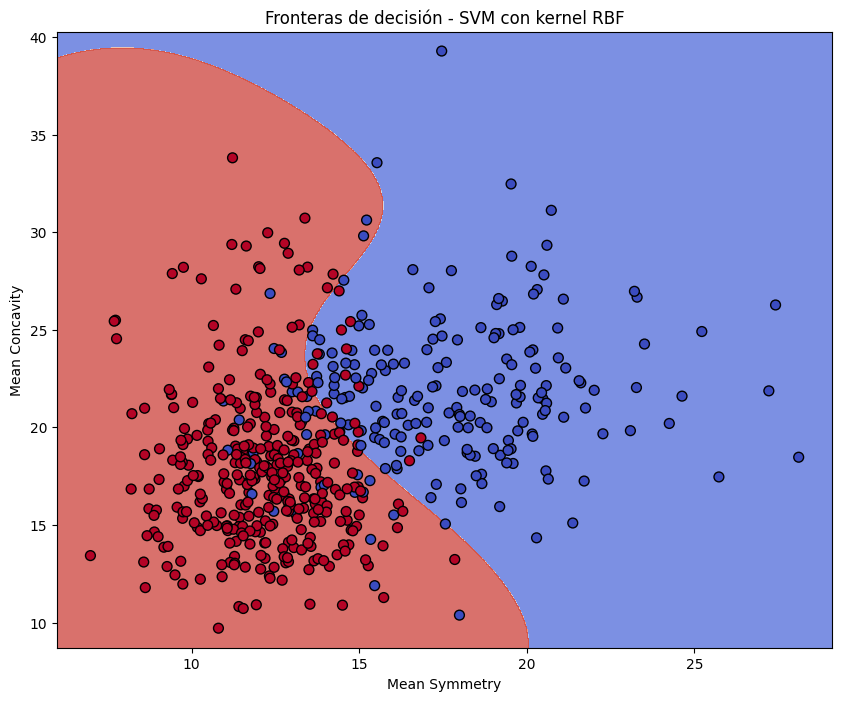

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Cargar el dataset de cáncer de mama
data = load_breast_cancer()

# Seleccionar un par de características
X = data.data[:, [0, 1]]  # Por ejemplo, Mean symmetry vs Mean concavity
y = data.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo SVM con kernel RBF
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

# Crear malla para graficar las fronteras de decisión
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir sobre la malla de puntos
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar frontera de decisión
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
plt.title("Fronteras de decisión - SVM con kernel RBF")
plt.xlabel("Mean Symmetry")
plt.ylabel("Mean Concavity")
plt.show()


c) Matriz de confusión de cada modelo
La matriz de confusión es útil para evaluar cómo el modelo está clasificando las instancias. Se puede generar para cada modelo utilizando:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Cargar el dataset de cáncer de mama
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Seleccionar un par de características para la evaluación
X = data.data[:, [0, 1]]  # Por ejemplo, Mean symmetry vs Mean concavity
y = data.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los modelos a evaluar
modelos = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVM (Linear)', SVC(kernel='linear', gamma='scale')),
    ('SVM (RBF)', SVC(kernel='rbf', gamma='scale')),
    ('Naive Bayes', GaussianNB())
]

# Crear lista para almacenar los resultados
resultados = []

# Evaluar cada modelo
for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Predicción
    cm = confusion_matrix(y_test, y_pred)  # Matriz de confusión
    fpr, tpr, _ = roc_curve(y_test, modelo.decision_function(X_test))  # Cálculo de la curva ROC
    roc_auc = auc(fpr, tpr)  # Cálculo del área bajo la curva ROC
    
    resultados.append((nombre, cm, fpr, tpr, roc_auc))  # Almacenar resultados

# Visualizar los resultados
for nombre, cm, fpr, tpr, roc_auc in resultados:
    print(f"Modelo: {nombre}")
    print(f"Matriz de Confusión:\n{cm}")
    print(f"AUC-ROC: {roc_auc:.2f}")
    
    # Gráfica de AUC-ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'AUC-ROC - {nombre}')
    plt.legend(loc='lower right')
    plt.show()


AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

d) Representación gráfica de AUC-ROC
Para obtener el gráfico AUC-ROC para cada modelo, puedes hacerlo de la siguiente forma:

In [ ]:
from sklearn.metrics import roc_curve, auc

# Graficar AUC-ROC para cada modelo
plt.figure(figsize=(10, 8))
for modelo in modelos:
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidad para la clase positiva
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{modelo.__class__.__name__} (AUC = {roc_auc:.2f})')

# Personalizar el gráfico
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Falso positivo (FPR)')
plt.ylabel('Verdadero positivo (TPR)')
plt.title('Curva AUC-ROC')
plt.legend(loc='lower right')
plt.show()
    

e) Gráficos que representan las fronteras de decisión
Para visualizar las fronteras de decisión, puedes utilizar matplotlib y seaborn. Aquí hay un ejemplo de cómo hacerlo para dos características del dataset (como la simetría vs. concavidad):

In [ ]:
import numpy as np

# Seleccionar un par de características
X = data.data[:, [0, 1]]  # Por ejemplo, Mean symmetry vs Mean concavity
y = data.target

# Entrenar el modelo (por ejemplo, SVM con kernel RBF)
from sklearn.svm import SVC
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

# Crear malla para graficar las fronteras de decisión
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir sobre la malla de puntos
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar frontera de decisión
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.75)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title("Fronteras de decisión - SVM")
plt.xlabel("Mean Symmetry")
plt.ylabel("Mean Concavity")
plt.show()


f) Conclusión
Una vez hayas realizado todas las evaluaciones y comparaciones, debes presentar la conclusión sobre cuál modelo es el más adecuado para resolver el problema del cáncer de mama. Esto se basará en la comparación de las métricas de rendimiento, AUC-ROC, matrices de confusión y fronteras de decisión. Probablemente, un modelo con buen desempeño en todas estas métricas será el elegido.

g) Enlaces públicos de los scripts y/o cuadernos Jupyter
Finalmente, debes incluir los enlaces públicos a los scripts de Python y/o los cuadernos de Jupyter que has utilizado para implementar los modelos. Puedes subir estos archivos a un repositorio de GitHub, o compartirlos a través de un servicio de almacenamiento en la nube como Google Drive.

